In [10]:
import pandas as pd

import os
os.chdir('C:/Users/adele/OneDrive/Documents/2024_WINTER/COSC3117/ass4 docs')

train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [3]:
train_data['age'].fillna(train_data['age'].median(), inplace=True)
test_data['age'].fillna(test_data['age'].median(), inplace=True)

train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)
test_data['embarked'].fillna(test_data['embarked'].mode()[0], inplace=True)

In [4]:
train_data = pd.get_dummies(train_data, columns=['sex', 'embarked'])
test_data = pd.get_dummies(test_data, columns=['sex', 'embarked'])

In [5]:
train_data

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,0,"Coleridge, Mr. Reginald Charles",29.0,0,0,W./C. 14263,10.5000,NaN,0,1,0,0,1
1,3,0,"O'Sullivan, Miss. Bridget Mary",28.0,0,0,330909,7.6292,NaN,1,0,0,1,0
2,3,0,"Petterson, Mr. Johan Emil",25.0,1,0,347076,7.7750,NaN,0,1,0,0,1
3,3,0,"Andersson, Mr. Anders Johan",39.0,1,5,347082,31.2750,NaN,0,1,0,0,1
4,3,0,"Vande Velde, Mr. Johannes Joseph",33.0,0,0,345780,9.5000,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,"Williams, Mr. Richard Norris II",21.0,0,1,PC 17597,61.3792,NaN,0,1,1,0,0
887,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",59.0,2,0,11769,51.4792,C101,1,0,0,0,1
888,2,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
889,2,0,"Phillips, Mr. Escott Robert",43.0,0,1,S.O./P.P. 2,21.0000,NaN,0,1,0,0,1


In [6]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']
X_train = train_data[features]
y_train = train_data['survived']
X_test = test_data[features]

In [11]:
# Fill missing values in 'Age' and 'Embarked' as before
train_data['age'].fillna(train_data['age'].median(), inplace=True)
test_data['age'].fillna(test_data['age'].median(), inplace=True)

train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)
test_data['embarked'].fillna(test_data['embarked'].mode()[0], inplace=True)

In [12]:
# Additionally, check and fill 'Fare' missing values
train_data['fare'].fillna(train_data['fare'].median(), inplace=True)
test_data['fare'].fillna(test_data['fare'].median(), inplace=True)

# Convert 'Sex' and 'Embarked' to dummy variables
train_data = pd.get_dummies(train_data, columns=['sex', 'embarked'])
test_data = pd.get_dummies(test_data, columns=['sex', 'embarked'])

# Select features
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']
X_train = train_data[features]
y_train = train_data['survived']
X_test = test_data[features]

# Check for any remaining NaN values in the training set
nan_columns_train = X_train.columns[X_train.isnull().any()].tolist()
nan_columns_test = X_test.columns[X_test.isnull().any()].tolist()

print(f"Columns with NaN in training set: {nan_columns_train}")
print(f"Columns with NaN in test set: {nan_columns_test}")

Columns with NaN in training set: []
Columns with NaN in test set: []


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9708193041526375


In [15]:
test_predictions = model.predict(X_test)
print(test_predictions)

[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0]


In [17]:
y_test = test_data['survived']

In [18]:
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7822966507177034


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

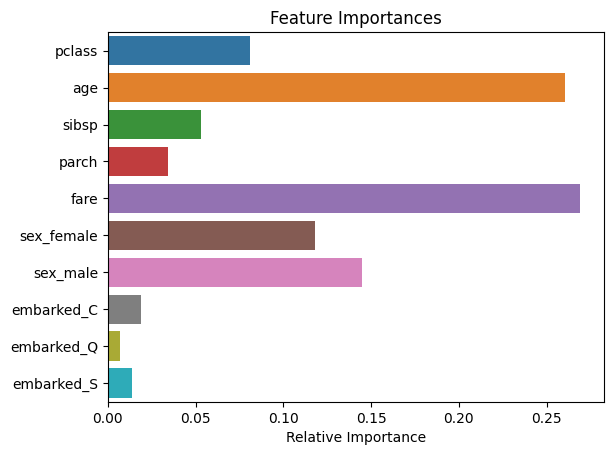

In [21]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()
